## Colour Detection using DL

#### Imports:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
import cv2
import shutil
from shutil import copyfile
import random

import keras
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator # from keras.preprocessing.image import ImageDataGenerator is deprecated
from sklearn.model_selection import train_test_split
from keras.utils import load_img, img_to_array
from tensorflow import keras
from keras.applications.vgg16 import VGG16
from keras.applications import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, MaxPooling2D, BatchNormalization, Activation, Dropout, Flatten, Conv2D, GlobalAveragePooling2D
from keras.models import Model
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#### Plot history:

In [2]:
# function to plote training history
def plot_history(history):
    # store results
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # plot results
    # accuracy
    plt.figure(figsize=(5, 8))
    plt.rcParams['figure.figsize'] = [8, 4]
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.grid'] = True
    plt.rcParams['figure.facecolor'] = 'white'
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.title(f'\nTraining and Validation Accuracy. \nTrain Accuracy: {str(round(acc[-1],3))}\nValidation Accuracy: {str(round(val_acc[-1],3))}')
    
    # loss
    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.title(f'Training and Validation Loss. \nTrain Loss: {str(round(loss[-1],3))}\nValidation Loss: {str(round(val_loss[-1],3))}')
    plt.xlabel('epoch')
    plt.tight_layout(pad=3.0)
    plt.show()

#### Setting up the data:

In [3]:
datagen = ImageDataGenerator(rescale=1./255)   

In [4]:
train_generator = datagen.flow_from_directory(
    'C:/Users/titik/OneDrive/Desktop/6th sem/DLL/Lab/Project',
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical')

Found 501 images belonging to 10 classes.


In [5]:
test_generator = datagen.flow_from_directory(
    'C:/Users/titik/OneDrive/Desktop/6th sem/DLL/Lab/Project',
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical')

Found 501 images belonging to 10 classes.


#### Approach 1: ResNet15V2

In [6]:
ResNet_model = keras.applications.ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [7]:
for layer in ResNet_model.layers[:-15]:       # Freezing all layers other than last 15 Layers
    layer.trainable = False

x = ResNet_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=10, activation='softmax')(x)
model = Model(ResNet_model.input, output)

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                              

In [9]:
loss = keras.losses.CategoricalCrossentropy()
optimizer = keras.optimizers.legacy.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])

In [10]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=test_generator.n//test_generator.batch_size

In [11]:
STEP_SIZE_TRAIN

25

In [12]:
STEP_SIZE_VALID

25

In [13]:
history = model.fit_generator(generator=train_generator,
                            steps_per_epoch=STEP_SIZE_TRAIN,
                            validation_data=test_generator,
                            validation_steps=STEP_SIZE_VALID,
                            epochs=10)

C:\Users\titik\AppData\Local\Temp\ipykernel_19980\3649151816.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/10


25/25 [==============================] - 365s 14s/step - loss: 2.2001 - accuracy: 0.1892 - val_loss: 9.0167 - val_accuracy: 0.1260
Epoch 2/10
25/25 [==============================] - 306s 12s/step - loss: 1.6254 - accuracy: 0.4012 - val_loss: 9.5816 - val_accuracy: 0.3260
Epoch 3/10
25/25 [==============================] - 311s 13s/step - loss: 1.3247 - accuracy: 0.5426 - val_loss: 5.3609 - val_accuracy: 0.4440
Epoch 4/10
25/25 [==============================] - 313s 13s/step - loss: 1.0734 - accuracy: 0.6279 - val_loss: 2.6284 - val_accuracy: 0.6480
Epoch 5/10
25/25 [==============================] - 351s 14s/step - loss: 0.8045 - accuracy: 0.7380 - val_loss: 3.4414 - val_accuracy: 0.6140
Epoch 6/10
25/25 [==============================] - 326s 13s/step - loss: 0.7466 - accuracy: 0.7547 - val_loss: 2.8118 - val_accuracy: 0.6320
Epoch 7/10
25/25 [==============================] - 323s 13s/step - loss: 0.6328 - accuracy: 0.8025 - val_loss: 2.0078 - val_accuracy: 0.7800
Epoc

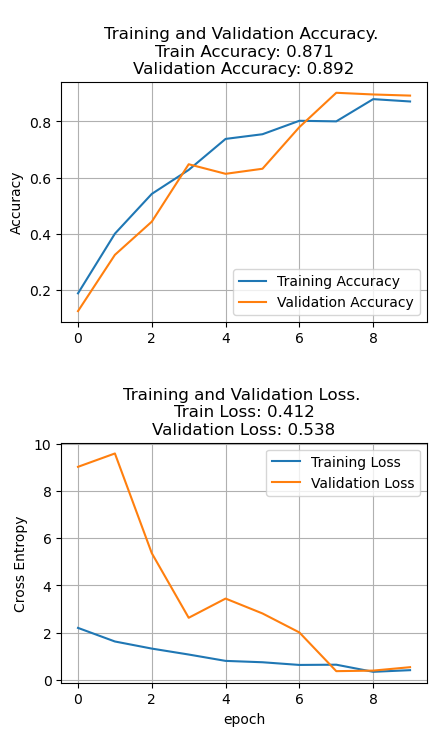

In [14]:
plot_history(history)

#### Approach 2: VGG16

In [15]:
# Load the pre-trained VGG19 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

In [16]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=10, activation='softmax')(x)
model = Model(base_model.input, output)

In [17]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [18]:
model.compile(optimizer = tf.keras.optimizers.legacy.Adam(),
            loss = 'binary_crossentropy',
            metrics=['accuracy'])

In [19]:
history = model.fit_generator(generator=train_generator,
                            steps_per_epoch=STEP_SIZE_TRAIN,
                            validation_data=test_generator,
                            validation_steps=STEP_SIZE_VALID,
                            epochs=10)

C:\Users\titik\AppData\Local\Temp\ipykernel_19980\2795265085.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/20
25/25 [==============================] - 316s 13s/step - loss: 0.3890 - accuracy: 0.0998 - val_loss: 0.3310 - val_accuracy: 0.1100
Epoch 2/20
25/25 [==============================] - 353s 14s/step - loss: 0.3379 - accuracy: 0.0998 - val_loss: 0.3214 - val_accuracy: 0.1900
Epoch 3/20
25/25 [==============================] - 369s 15s/step - loss: 0.3305 - accuracy: 0.1414 - val_loss: 0.3169 - val_accuracy: 0.1820
Epoch 4/20
25/25 [==============================] - 366s 15s/step - loss: 0.3246 - accuracy: 0.1289 - val_loss: 0.3163 - val_accuracy: 0.1000
Epoch 5/20
25/25 [==============================] - 336s 14s/step - loss: 0.3220 - accuracy: 0.1497 - val_loss: 0.3084 - val_accuracy: 0.1700
Epoch 6/20
25/25 [==============================] - 316s 13s/step - loss: 0.3167 - accuracy: 0.1705 - val_loss: 0.2976 - val_accuracy: 0.2360
Epoch 7/20
25/25 [==============================] - 355s 14s/step - loss: 0.3031 - accuracy: 0.2640 - val_loss: 0.2861 - val_accuracy: 0.3380
Epoch 

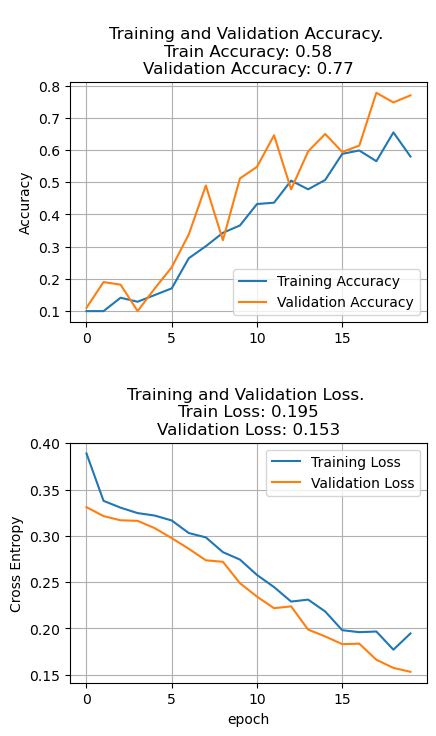

In [20]:
 plot_history(history)

In [21]:
### Approach 3: EfficientNetB0

In [22]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Load the pre-trained EfficientNetB0 model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(10, activation='softmax')(x)

# Combine the base model with custom head
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


16705208/16705208 [==============================] - 3s 0us/step

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_3[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)  

In [23]:
# Train the model
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=STEP_SIZE_TRAIN,
                              validation_data=test_generator,
                              validation_steps=STEP_SIZE_VALID,
                              epochs=10)

C:\Users\titik\AppData\Local\Temp\ipykernel_19980\3240938733.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/20
25/25 [==============================] - 44s 1s/step - loss: 2.4192 - accuracy: 0.0998 - val_loss: 2.3243 - val_accuracy: 0.1000
Epoch 2/20
25/25 [==============================] - 32s 1s/step - loss: 2.3616 - accuracy: 0.0852 - val_loss: 2.3238 - val_accuracy: 0.1040
Epoch 3/20
25/25 [==============================] - 37s 1s/step - loss: 2.3487 - accuracy: 0.0873 - val_loss: 2.3219 - val_accuracy: 0.1040
Epoch 4/20
25/25 [==============================] - 32s 1s/step - loss: 2.3343 - accuracy: 0.0894 - val_loss: 2.3056 - val_accuracy: 0.1000
Epoch 5/20
25/25 [==============================] - 32s 1s/step - loss: 2.3129 - accuracy: 0.0790 - val_loss: 2.3047 - val_accuracy: 0.1000
Epoch 6/20
25/25 [==============================] - 39s 2s/step - loss: 2.3150 - accuracy: 0.1019 - val_loss: 2.3064 - val_accuracy: 0.1040
Epoch 7/20
25/25 [==============================] - 36s 1s/step - loss: 2.3129 - accuracy: 0.0915 - val_loss: 2.3039 - val_accuracy: 0.1000
Epoch 8/20
25/25 [==

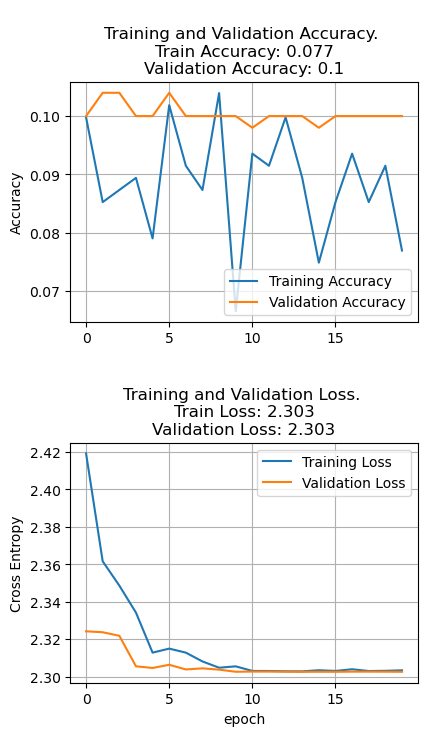

In [25]:
 plot_history(history)

In [24]:
import numpy as np
from keras.preprocessing import image

# Function to load and preprocess a single image for prediction
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)  # Preprocess the image according to the model's requirements
    return img_array

# Function to make predictions on a single image
def predict_image(model, image_path):
    preprocessed_image = preprocess_image(image_path)
    predictions = model.predict(preprocessed_image)
    return predictions

# Example usage:
image_path ="C:/Users/titik/OneDrive/Desktop/6th sem/DLL/Lab/Project/violet/voilet13.jpg"
predictions = predict_image(model, image_path)
predicted_class_index = np.argmax(predictions)  # Get the index of the class with the highest probability
print("Predicted class index:", predicted_class_index)


1/1 [==============================] - 6s 6s/step
Predicted class index: 6
